# 图论

熟悉知识点


# [卡码网98-所有可达路径](https://kamacoder.com/problempage.php?pid=1170)

[题目描述]

给定一个有 n 个节点的有向无环图，节点编号从 1 到 n。请编写一个程序，找出并返回所有从节点 1 到节点 n 的路径。每条路径应以节点编号的列表形式表示。

[输入描述]

第一行包含两个整数 N，M，表示图中拥有 N 个节点，M 条边

后续 M 行，每行包含两个整数 s 和 t，表示图中的 s 节点与 t 节点中有一条路径

[输出描述]

输出所有的可达路径，路径中所有节点的后面跟一个空格，每条路径独占一行，存在多条路径，路径输出的顺序可任意。

如果不存在任何一条路径，则输出 -1。

注意输出的序列中，最后一个节点后面没有空格！ 例如正确的答案是 1 3 5,而不是 1 3 5， 5后面没有空格！

[输入示例]

```
5 5
1 3
3 5
1 2
2 4
4 5
```

[输出示例]

```
1 3 5
1 2 4 5  
```

[提示信息]

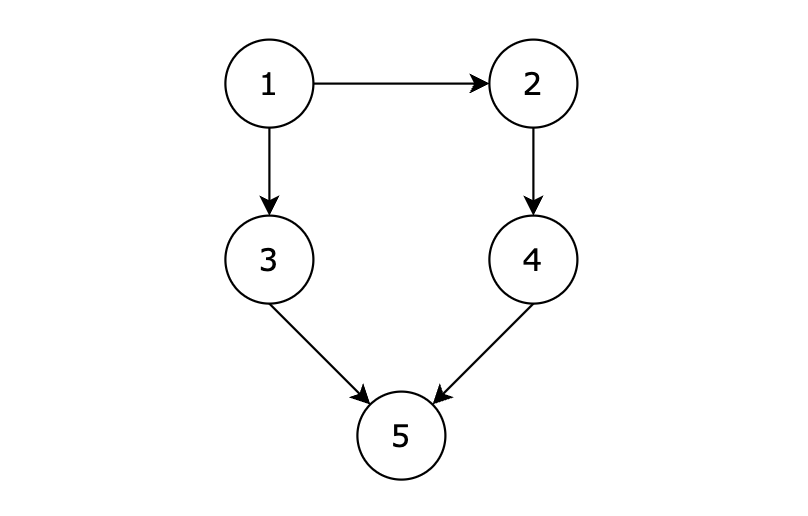

用例解释：

有五个节点，其中的从 1 到达 5 的路径有两个，分别是 1 -> 3 -> 5 和 1 -> 2 -> 4 -> 5。

因为拥有多条路径，所以输出结果为：
```
1 3 5
1 2 4 5
```
或
```
1 2 4 5
1 3 5
```
都算正确。



数据范围：

- 图中不存在自环
- 图中不存在平行边
- 1 <= N <= 100
- 1 <= M <= 500


In [3]:
from typing import List

# 使用深度优先搜索进行遍历

res = []
path = []

def dfs(graph, x, n):
    # x是当前遍历的节点，n是要到达的节点
    if x == n:
        res.append(path[:])
        return 
    for i in range(1, n + 1):
        if graph[x][i] == 1:
            path.append(i)
            dfs(graph, i, n)
            path.pop()


def main():
    n, m = map(int, input().split())

    graph = [[0] * (n + 1) for _ in range(n + 1)]
    
    while m:
        s, t = map(int, input().split())
        graph[s][t] = 1
        m -= 1
    

    path.append(1)

    dfs(graph, 1, n)

    if len(res) == 0:
        print(-1)

    for p in res:
        print(" ".join(map(str, p)))

if __name__ == "__main__":
    main()
 

1 2 4 5
1 3 5


# [Leetcode797-所有可能的路径](https://leetcode.cn/problems/all-paths-from-source-to-target/description/)

给你一个有 n 个节点的 有向无环图（DAG），请你找出所有从节点 0 到节点 n-1 的路径并输出（不要求按特定顺序）

graph[i] 是一个从节点 i 可以访问的所有节点的列表（即从节点 i 到节点 graph[i][j]存在一条有向边）。

示例 1：

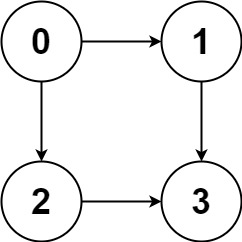

- 输入：graph = [[1,2],[3],[3],[]]
- 输出：[[0,1,3],[0,2,3]]
- 解释：有两条路径 0 -> 1 -> 3 和 0 -> 2 -> 3

示例 2：

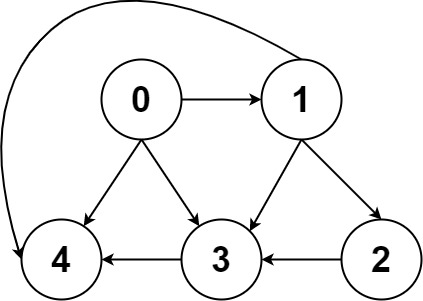

- 输入：graph = [[4,3,1],[3,2,4],[3],[4],[]]
- 输出：[[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]]

提示：

- n == graph.length
- 2 <= n <= 15
- 0 <= graph[i][j] < n
- graph[i][j] != i（即不存在自环）
- graph[i] 中的所有元素 互不相同
- 保证输入为 有向无环图（DAG）


In [4]:
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        # 使用深度优先遍历求解
        res = []
        path = [0]
        n = len(graph)
        def dfs(x):
            if x == n - 1:
                res.append(path[:])
                return 
            
            for node in graph[x]:
                path.append(node)
                dfs(node)
                path.pop()
        dfs(0)
        return res


# [Leetcode200-岛屿数量](https://leetcode.cn/problems/number-of-islands/?envType=study-plan-v2&envId=top-100-liked)

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。

岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

示例 1：
- 输入：grid = [  
  ["1","1","1","1","0"],  
  ["1","1","0","1","0"],  
  ["1","1","0","0","0"],  
  ["0","0","0","0","0"]  
]
- 输出：1

示例 2：
- 输入：grid = [  
  ["1","1","0","0","0"],  
  ["1","1","0","0","0"],  
  ["0","0","1","0","0"],  
  ["0","0","0","1","1"]  
]
- 输出：3

提示：
- m == grid.length
- n == grid[i].length
- 1 <= m, n <= 300
- grid[i][j] 的值为 '0' 或 '1'

In [ ]:
from typing import List
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        # n * m 的矩阵
        # 这里用深度优先搜索来解决的
        dir = [
            [0, 1],
            [0, -1],
            [1, 0],
            [-1, 0],
        ]
        def dfs(grid, visited, x, y):
            for i in range(4):
                nextx = x + dir[i][0]
                nexty = y + dir[i][1]
                if nextx < 0 or nextx >= len(grid) or nexty < 0 or nexty >= len(grid[0]):
                    continue
                if not visited[nextx][nexty] and grid[nextx][nexty] == '1':
                    visited[nextx][nexty] = True
                    dfs(grid, visited, nextx, nexty)
        res = 0
        n = len(grid) # 行数
        m = len(grid[0]) # 列数
        visited = [[False] * m for _ in range(n)]
        for i in range(n):
            for j in range(m):
                if not visited[i][j] and grid[i][j] == '1':
                    visited[i][j] = True
                    res += 1
                    dfs(grid, visited, i, j)
        return res

In [ ]:
from typing import List
from collections import deque
# 使用了广度优先搜索
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        n, m = len(grid), len(grid[0])
        visited = [[False] * m for _ in range(n)]

        def bfs(x, y):
            que = deque()
            que.append((x, y))
            visited[x][y] = True
            while que:
                curx, cury = que.popleft()
                for dx, dy in directions:
                    nx, ny = curx + dx, cury + dy
                    if 0 <= nx < n and 0 <= ny < m:
                        if not visited[nx][ny] and grid[nx][ny] == '1':
                            visited[nx][ny] = True
                            que.append((nx, ny))

        res = 0
        for i in range(n):
            for j in range(m):
                if not visited[i][j] and grid[i][j] == '1':
                    res += 1
                    bfs(i, j)
        return res


# [卡码网99-岛屿数量](https://kamacoder.com/problempage.php?pid=1171)

题目描述：
给定一个由 1（陆地）和 0（水）组成的矩阵，你需要计算岛屿的数量。岛屿由水平方向或垂直方向上相邻的陆地连接而成，并且四周都是水域。你可以假设矩阵外均被水包围。

输入描述：

第一行包含两个整数 N, M，表示矩阵的行数和列数。

后续 N 行，每行包含 M 个数字，数字为 1 或者 0。

输出描述：

输出一个整数，表示岛屿的数量。如果不存在岛屿，则输出 0。

输入示例：

```
4 5
1 1 0 0 0
1 1 0 0 0
0 0 1 0 0
0 0 0 1 1
```

输出示例：

3

In [ ]:
def fun(grid) -> int:
    # grid是一个n * m 的矩阵
    # 使用dfs来求解
    n = len(grid)
    m = len(grid[0])
    dirs = [
        [0, 1],
        [0,-1],
        [-1, 0],
        [1, 0]
    ]
    def dfs(grid, visited, x, y):
        for i in range(4):
            nextx = x + dirs[i][0]
            nexty = y + dirs[i][1]
            if nextx < 0 or nextx >= n or nexty < 0 or nexty >= m:
                continue
            if not visited[nextx][nexty] and grid[nextx][nexty] == 1:
                visited[nextx][nexty] = True
                dfs(grid, visited, nextx, nexty)
    res = 0
    visited = [[False] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 1 and visited[i][j] == False:
                visited[i][j] = True
                res += 1
                dfs(grid, visited, i, j)
    return res

def main():
    n, m = map(int, input().split())
    grid = [[0] * m for _ in range(n)]
    for i in range(n):
        row = list(map(int, input().split()))
        for j in range(m):
            grid[i][j] = row[j]
    res = fun(grid)
    print(res)

if __name__ == "__main__":
    main()


